In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


#loading data
CSV_PATH = '../data/togo-dapaong_qc.csv'
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()

print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")
df.head()


Rows: 525,600  |  Columns: 19


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [2]:
# Select numeric columns and show describe()
num_cols = df.select_dtypes(include=[np.number]).columns
summary_stats = df[num_cols].describe().T  # transpose for readability
display(summary_stats)

count        mean         std    min    25%    50%      75%  \
GHI            525600.0  230.555040  322.532347  -12.7   -2.2    2.1  442.400   
DNI            525600.0  151.258469  250.956962    0.0    0.0    0.0  246.400   
DHI            525600.0  116.444352  156.520714    0.0    0.0    2.5  215.700   
ModA           525600.0  226.144375  317.346938    0.0    0.0    4.4  422.525   
ModB           525600.0  219.568588  307.932510    0.0    0.0    4.3  411.000   
Tamb           525600.0   27.751788    4.758023   14.9   24.2   27.2   31.100   
RH             525600.0   55.013160   28.778732    3.3   26.5   59.3   80.800   
WS             525600.0    2.368093    1.462668    0.0    1.4    2.2    3.200   
WSgust         525600.0    3.229490    1.882565    0.0    1.9    2.9    4.400   
WSstdev        525600.0    0.557740    0.268923    0.0    0.4    0.5    0.700   
WD             525600.0  161.741845   91.877217    0.0   74.8  199.1  233.500   
WDstdev        525600.0   10.559568    5.915490    0.0    6.9   10.8   14.100   
BP             525600.0  975.915242    2.153977  968.0  975.0  976.0  977.000   
Cleaning       525600.0    0.000535    0.023116    0.0    0.0    0.0    0.000   
Precipitation  525600.0    0.001382    0.026350    0.0    0.0    0.0    0.000   
TModA          525600.0   32.444403   10.998334   13.1   23.9   28.4   40.600   
TModB          525600.0   33.543330   12.769277   13.1   23.6   28.4   43.000   
Comments            0.0         NaN         NaN    NaN    NaN    NaN      NaN   

                  max  
GHI            1424.0  
DNI            1004.5  
DHI             805.7  
ModA           1380.0  
ModB           1367.0  
Tamb             41.4  
RH               99.8  
WS               16.1  
WSgust           23.1  
WSstdev           4.7  
WD              360.0  
WDstdev          86.9  
BP              983.0  
Cleaning          1.0  
Precipitation     2.3  
TModA            70.4  
TModB            94.6  
Comments          NaN

In [3]:
#missing value report

missing_report = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2)
}).sort_values("missing_pct", ascending=False)

display(missing_report)

missing_count  missing_pct
Comments              525600        100.0
WSstdev                    0          0.0
TModB                      0          0.0
TModA                      0          0.0
Precipitation              0          0.0
Cleaning                   0          0.0
BP                         0          0.0
WDstdev                    0          0.0
WD                         0          0.0
Timestamp                  0          0.0
GHI                        0          0.0
WS                         0          0.0
RH                         0          0.0
Tamb                       0          0.0
ModB                       0          0.0
ModA                       0          0.0
DHI                        0          0.0
DNI                        0          0.0
WSgust                     0          0.0

In [4]:
# List columns with >5% nulls
high_nulls = missing_report[missing_report["missing_pct"] > 5]
display(high_nulls)

# Also print just the column names as a quick list
print("Columns with >5% nulls:", high_nulls.index.tolist())

missing_count  missing_pct
Comments         525600        100.0

Columns with >5% nulls: ['Comments']


In [5]:

# 1) Drop columns that are 100% missing (e.g., "Comments")
fully_null = df.columns[df.isna().mean() == 1.0]
if len(fully_null) > 0:
    print("Dropping fully-null columns:", fully_null.tolist())
    df = df.drop(columns=fully_null)

# 2) Define columns we care about
key_cols_all = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","TModA","TModB","RH","BP","WD"]
zscore_cols_all = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]

key_cols = [c for c in key_cols_all if c in df.columns]
z_cols  = [c for c in zscore_cols_all if c in df.columns]

print("Key columns present:", key_cols)
print("Z-score columns present:", z_cols)

# 3) Ensure numeric types (non-numeric -> NaN)
for c in key_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

raw_df = df.copy() 

Dropping fully-null columns: ['Comments']
Key columns present: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'TModA', 'TModB', 'RH', 'BP', 'WD']
Z-score columns present: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [6]:
#Flag physically impossible values and set them to NaN

invalid_any = pd.Series(False, index=df.index)
violation_counts = {}

def mark_invalid(col, mask, reason):
    global invalid_any
    if col in df.columns:
        violation_counts[reason] = int(mask.sum())
        invalid_any = invalid_any | mask
        df.loc[mask, col] = np.nan

# Irradiance and wind speeds must be >= 0
for c in ["GHI","DNI","DHI","WS","WSgust"]:
    if c in df.columns:
        m = df[c] < 0
        mark_invalid(c, m, f"neg_{c}")

# Gust should be >= WS
if "WSgust" in df.columns and "WS" in df.columns:
    m = df["WSgust"] < df["WS"]
    # set WSgust to NaN when it's less than WS (likely faulty gust reading)
    mark_invalid("WSgust", m, "gust_lt_ws")

# Wind direction 0–360
if "WD" in df.columns:
    m = ~df["WD"].between(0, 360)
    mark_invalid("WD", m, "bad_WD")

# Relative humidity 0–100
if "RH" in df.columns:
    m = ~df["RH"].between(0, 100)
    mark_invalid("RH", m, "bad_RH")

# Temperatures in plausible range [-30, 80] C
for c in ["Tamb","TModA","TModB"]:
    if c in df.columns:
        m = ~df[c].between(-30, 80)
        mark_invalid(c, m, f"out_of_range_{c}")

print("Invalid-value fixes:", violation_counts)

Invalid-value fixes: {'neg_GHI': 257385, 'neg_DNI': 0, 'neg_DHI': 0, 'neg_WS': 0, 'neg_WSgust': 0, 'gust_lt_ws': 0, 'bad_WD': 0, 'bad_RH': 0, 'out_of_range_Tamb': 0, 'out_of_range_TModA': 0, 'out_of_range_TModB': 224}


In [7]:
#Z-scores for outliers (|Z| > 3), then set those outliers to NaN

def safe_zscore(s: pd.Series):
    s = s.astype(float)
    mu = s.mean(skipna=True)
    sd = s.std(skipna=True, ddof=0)
    if not np.isfinite(sd) or sd == 0:
        return pd.Series(0.0, index=s.index)
    return (s - mu) / sd

outlier_any = pd.Series(False, index=df.index)
outlier_counts = {}

for c in z_cols:
    z = safe_zscore(df[c])
    df[f"z_{c}"] = z
    out_mask = z.abs() > 3
    df[f"outlier_{c}"] = out_mask
    outlier_counts[c] = int(out_mask.sum())
    # Set outliers to NaN for cleaning
    df.loc[out_mask, c] = np.nan
    outlier_any = outlier_any | out_mask

print("Outliers flagged (|Z|>3):", outlier_counts)
print("Rows with any outlier:", int(outlier_any.sum()))


Outliers flagged (|Z|>3): {'GHI': 5, 'DNI': 1062, 'DHI': 3415, 'ModA': 137, 'ModB': 206, 'WS': 3510, 'WSgust': 3915}
Rows with any outlier: 9146


In [8]:
# Impute missing values in key columns with median

imputed_any = pd.Series(False, index=df.index)

for c in key_cols:
    med = df[c].median()
    if pd.isna(med):
        print(f"Skipped imputation for {c}: median is NaN (column likely empty).")
        continue
    m = df[c].isna()
    df.loc[m, c] = med
    df[f"imputed_{c}"] = m
    imputed_any = imputed_any | m

# Cleaning flag: any invalid fix OR outlier OR imputation happened
df["clean_flag"] = (invalid_any | outlier_any | imputed_any)

print("Rows cleaned (any fix/impute):", int(df["clean_flag"].sum()), "of", len(df))



Rows cleaned (any fix/impute): 265242 of 525600


In [9]:
#Save cleaned data to the project data folder

import os
os.makedirs("../data", exist_ok=True)

CLEAN_PATH = "../data/togo_clean.csv"
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned file to:", CLEAN_PATH)

Saved cleaned file to: ../data/togo_clean.csv


In [10]:
#Load cleaned data and parse Timestamp

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 4)

# Load cleaned CSV (saved earlier)
CLEAN_PATH = "../data/togo_clean.csv"
df = pd.read_csv(CLEAN_PATH)

# Find/standardize the time column
time_col = None
for c in df.columns:
    cl = c.strip().lower()
    if cl in ["timestamp", "datetime", "date", "time"] or "time" in cl or "date" in cl:
        time_col = c
        break

if time_col is None:
    raise ValueError("No time-like column found. Tell me the exact column name for timestamps.")

df = df.rename(columns={time_col: "Timestamp"})
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df = df.dropna(subset=["Timestamp"]).sort_values("Timestamp").reset_index(drop=True)

present = [c for c in ["GHI","DNI","DHI","Tamb"] if c in df.columns]
print("Variables available for plotting:", present)


Variables available for plotting: ['GHI', 'DNI', 'DHI', 'Tamb']


In [12]:
#Resample to hourly for cleaner plots (minute-level is too dense)
# Use hourly means for smoother plots; also keep daily for bar charts if needed
df_h = df.set_index("Timestamp")[present].resample("H").mean()
df_d = df.set_index("Timestamp")[present].resample("D").mean()

print("Hourly shape:", df_h.shape, "Daily shape:", df_d.shape)


C:\Users\haymi\AppData\Local\Temp\ipykernel_14256\4291476985.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_h = df.set_index("Timestamp")[present].resample("H").mean()


Hourly shape: (8761, 4) Daily shape: (366, 4)


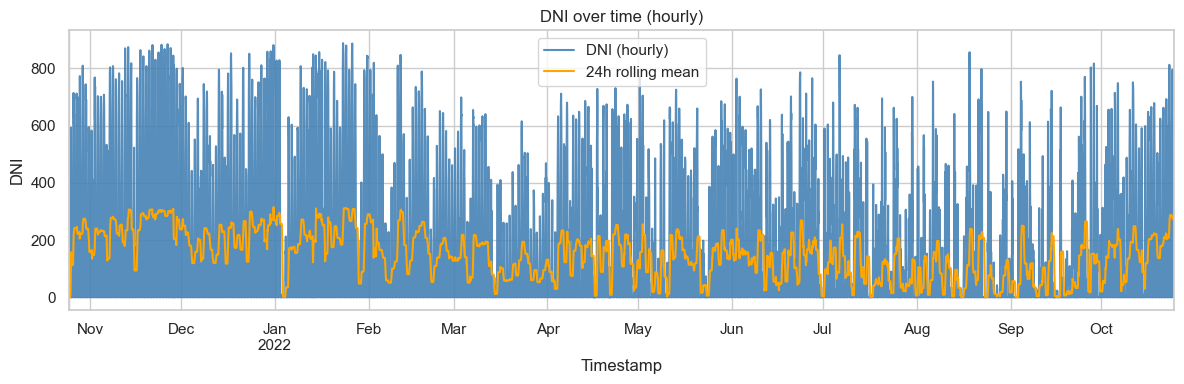

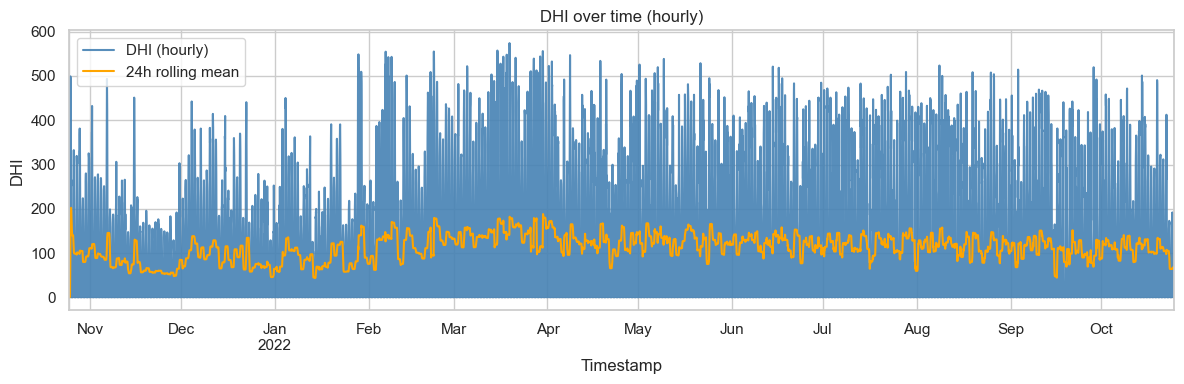

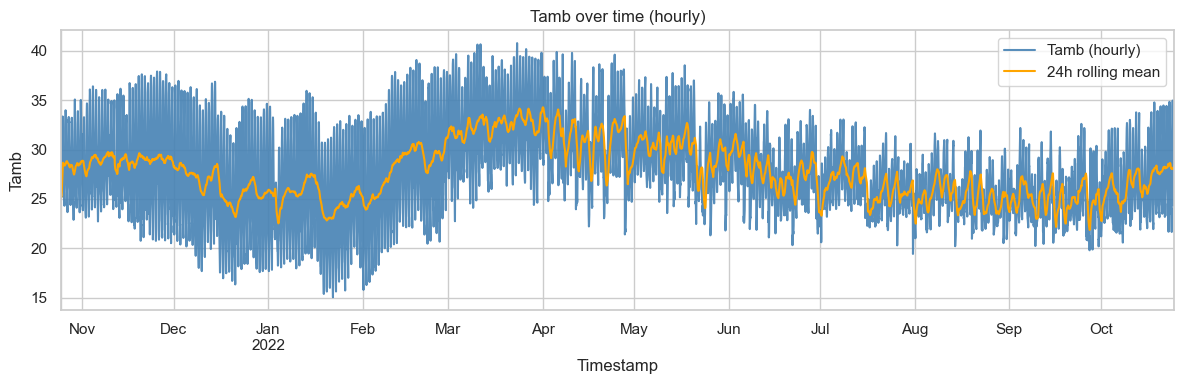

In [13]:
# Line charts of GHI, DNI, DHI, Tamb over time (hourly)
for col in present:
    ax = df_h[col].plot(color="steelblue", alpha=0.9, label=f"{col} (hourly)")
    # 24-hour rolling mean to see trend
    df_h[col].rolling(24, min_periods=1).mean().plot(ax=ax, color="orange", label="24h rolling mean")
    plt.title(f"{col} over time (hourly)")
    plt.xlabel("Timestamp"); plt.ylabel(col)
    plt.legend()
    plt.tight_layout(); plt.show()

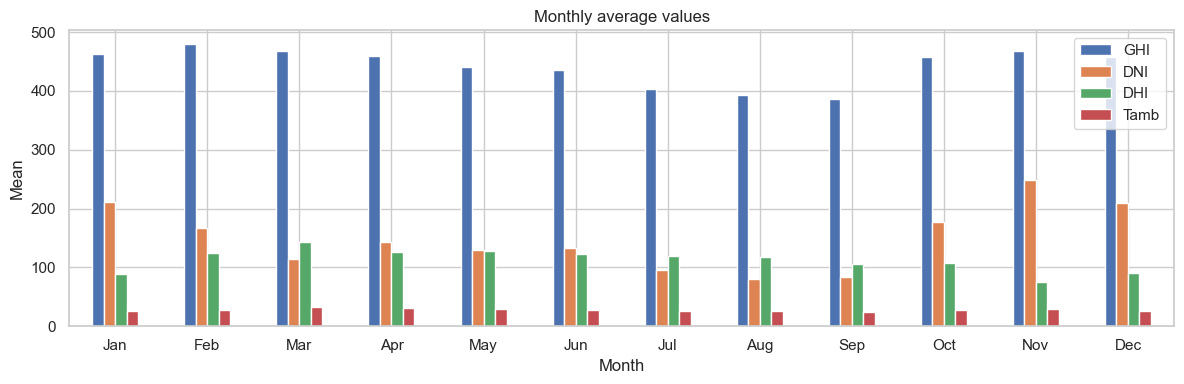

In [14]:
#Monthly patterns (bar charts of monthly averages)
ts = df.copy()
ts["month_num"] = ts["Timestamp"].dt.month
ts["month"] = ts["Timestamp"].dt.month_name().str.slice(stop=3)
order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

monthly_mean = ts.groupby("month")[present].mean().reindex(order)
monthly_mean.plot(kind="bar", rot=0)
plt.title("Monthly average values")
plt.xlabel("Month"); plt.ylabel("Mean")
plt.tight_layout(); plt.show()



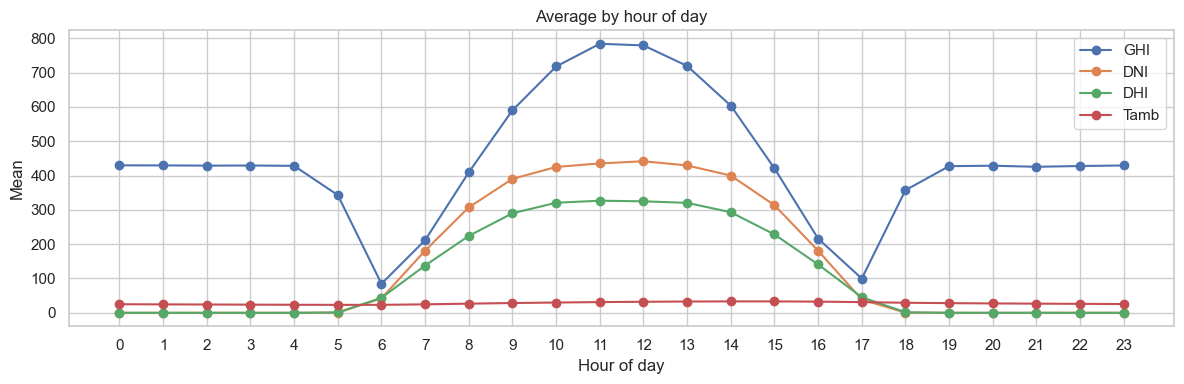

In [15]:
# Diurnal (hour-of-day) patterns across the whole dataset
ts["hour"] = ts["Timestamp"].dt.hour
hourly_pattern = ts.groupby("hour")[present].mean()
hourly_pattern.plot(marker="o")
plt.title("Average by hour of day")
plt.xlabel("Hour of day"); plt.ylabel("Mean")
plt.xticks(range(0,24))
plt.tight_layout(); plt.show()

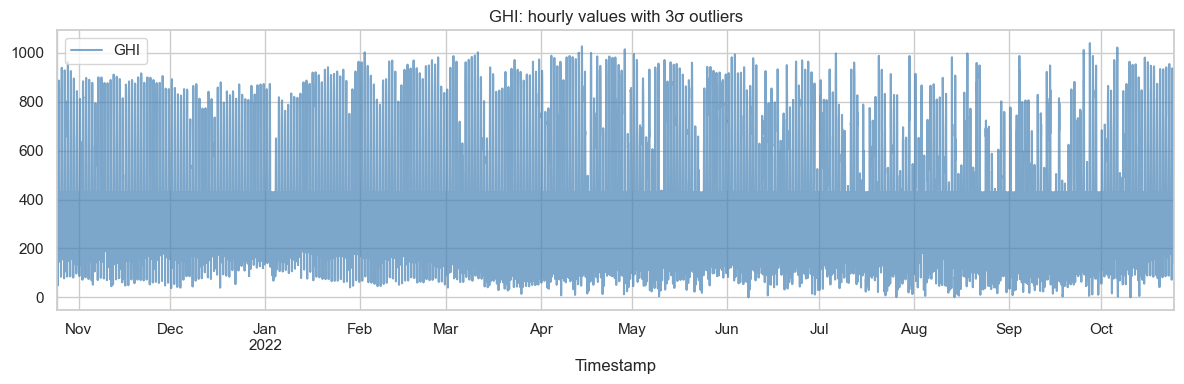

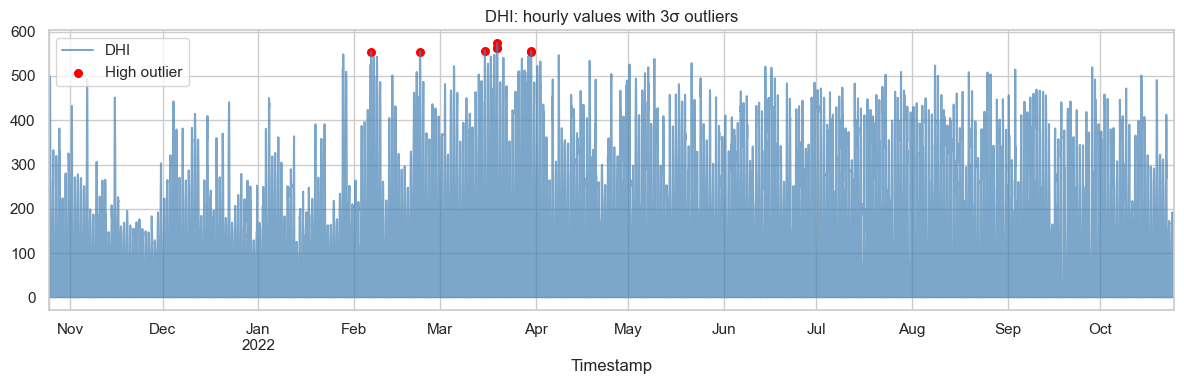

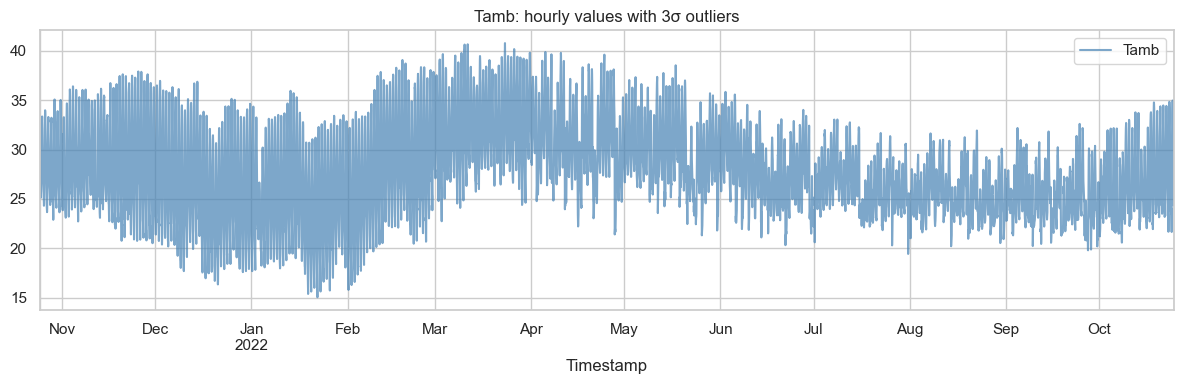

Outlier counts (hourly, |Z|>3): {'GHI': 0, 'DNI': 27, 'DHI': 8, 'Tamb': 0}


In [16]:
#Quick anomaly markers (3σ outliers on hourly series)
import numpy as np
import matplotlib.pyplot as plt

# If 'present' or 'df_h' aren't defined in the current session, recreate them quickly:
if 'present' not in locals():
    present = [c for c in ["GHI","DNI","DHI","Tamb"] if c in df.columns]
if 'df_h' not in locals():
    df_h = df.set_index("Timestamp")[present].resample("H").mean()

anom_counts = {}

for col in present:
    s = df_h[col]
    s_valid = s.dropna()

    # Guard against constant series (std == 0) or empty series
    if s_valid.empty:
        print(f"{col}: no data to analyze.")
        anom_counts[col] = 0
        continue

    mu = s_valid.mean()
    sd = s_valid.std(ddof=0)
    if not np.isfinite(sd) or sd == 0:
        print(f"{col}: no variability (std=0); skipping anomaly marking.")
        anom_counts[col] = 0
        continue

    z = (s_valid - mu) / sd
    high_idx = z[z > 3].index
    low_idx  = z[z < -3].index

    anom_counts[col] = len(high_idx) + len(low_idx)

    ax = s.plot(color="steelblue", alpha=0.7, label=col)
    # Only overlay markers if there are any points
    if len(high_idx) > 0:
        ax.scatter(high_idx, s.loc[high_idx], color="red", s=30, label="High outlier")
    if len(low_idx) > 0:
        ax.scatter(low_idx, s.loc[low_idx], color="purple", s=30, label="Low outlier")

    plt.title(f"{col}: hourly values with 3σ outliers")
    handles, labels = ax.get_legend_handles_labels()
    # Deduplicate legend entries
    unique = dict(zip(labels, handles))
    ax.legend(unique.values(), unique.keys())
    plt.tight_layout(); plt.show()

print("Outlier counts (hourly, |Z|>3):", anom_counts)

In [17]:
#Load cleaned data and ensure clean_flag exists


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# Load cleaned
clean_path = "../data/togo_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure clean_flag exists (fallback: derive from imputed_*/outlier_* columns)
if "clean_flag" not in clean_df.columns:
    imputed_cols = [c for c in clean_df.columns if c.startswith("imputed_")]
    outlier_cols = [c for c in clean_df.columns if c.startswith("outlier_")]
    if imputed_cols or outlier_cols:
        clean_df["clean_flag"] = clean_df[imputed_cols + outlier_cols].any(axis=1)
    else:
        raise ValueError("clean_flag not found and no imputed_/outlier_ columns to derive it from.")

sensors = [c for c in ["ModA", "ModB"] if c in clean_df.columns]
print("Sensors present:", sensors)
if not sensors:
    raise ValueError("ModA/ModB not found. Tell me the column names for the module sensors.")

Sensors present: ['ModA', 'ModB']


Using in-memory raw_df (pre-clean).
Alignment method: timestamp merge


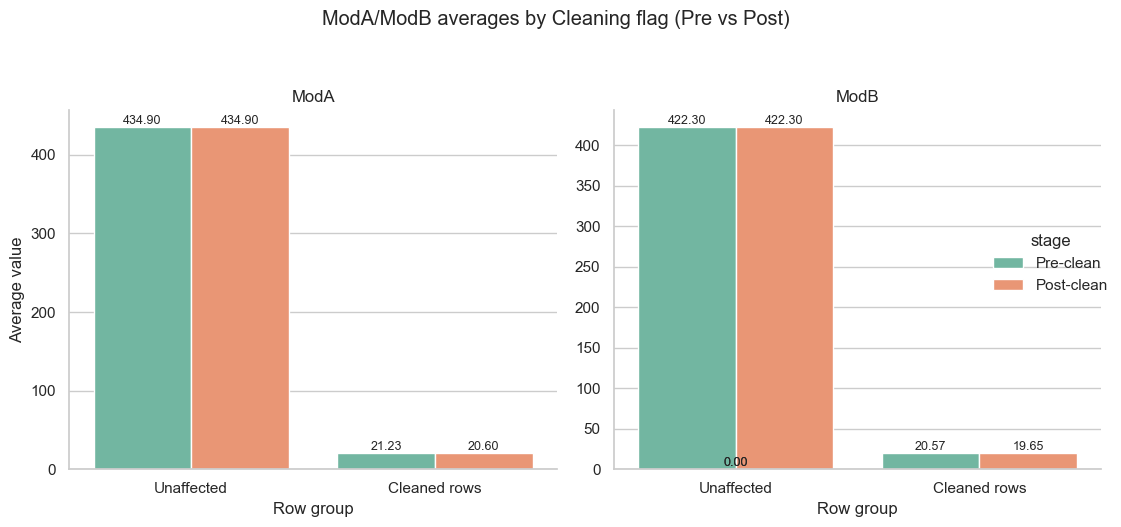

stage sensor         group  Post-clean   Pre-clean     Delta  Delta_pct
0       ModA  Cleaned rows   20.600930   21.229647 -0.628717  -2.961504
1       ModA    Unaffected  434.903054  434.903054  0.000000   0.000000
2       ModB  Cleaned rows   19.650597   20.570533 -0.919937  -4.472108
3       ModB    Unaffected  422.299605  422.299605  0.000000   0.000000

In [18]:
#Get the pre-clean (raw) data

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# 1) Paths
clean_path = "../data/togo_clean.csv"  

# 2) Load cleaned and ensure clean_flag exists
clean_df = pd.read_csv(clean_path)

imputed_cols = [c for c in clean_df.columns if c.startswith("imputed_")]
outlier_cols = [c for c in clean_df.columns if c.startswith("outlier_")]
if "clean_flag" not in clean_df.columns:
    if imputed_cols or outlier_cols:
        clean_df["clean_flag"] = clean_df[imputed_cols + outlier_cols].any(axis=1)
    else:
        raise ValueError("clean_flag not found and cannot be derived. Re-run the cleaning step to add it.")

sensors = [c for c in ["ModA", "ModB"] if c in clean_df.columns]
if not sensors:
    raise ValueError("ModA/ModB not found in cleaned data. Tell me the sensor column names present.")

# 3) Try to get pre-clean data
pre_df = None
alignment = None

if "raw_df" in globals():  # best case: we kept it in memory from the cleaning step
    pre_df = raw_df.copy()
    print("Using in-memory raw_df (pre-clean).")
else:
    
    
    raw_path = '../data/togo_clean.csv'

    if raw_path is not None:
        print("Loading raw data from:", raw_path)
        pre_df = pd.read_csv(raw_path)
    else:
        print("WARNING: Could not find a raw (pre-clean) CSV. "
              "Proceeding with post-clean only summary. "
              "If you provide the raw path, we can compute true pre vs post.")

# 4) If we don't have pre_df OR if someone points raw_path to the cleaned file, do post-only
post_only = pre_df is None or os.path.abspath(clean_path) == os.path.abspath(locals().get("raw_path", ""))

if not post_only:
    # Make both numeric where needed
    for c in sensors:
        pre_df[c] = pd.to_numeric(pre_df[c], errors="coerce")
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

    # Try to align by time column first, else by index
    def find_time_col(df_):
        for c in df_.columns:
            cl = c.lower()
            if cl in ["timestamp", "datetime", "date", "time"] or "time" in cl or "date" in cl:
                return c
        return None

    t_pre = find_time_col(pre_df)
    t_post = find_time_col(clean_df)
    if t_pre and t_post:
        pre_df = pre_df.rename(columns={t_pre: "Timestamp"})
        clean_df = clean_df.rename(columns={t_post: "Timestamp"})
        pre_df["Timestamp"] = pd.to_datetime(pre_df["Timestamp"], errors="coerce")
        clean_df["Timestamp"] = pd.to_datetime(clean_df["Timestamp"], errors="coerce")

        # Merge to align rows on timestamp
        merged = pd.merge(
            clean_df[["Timestamp","clean_flag"] + sensors],
            pre_df[["Timestamp"] + sensors],
            on="Timestamp",
            how="inner",
            suffixes=("_post", "_pre")
        )
        working = merged
        alignment = "timestamp merge"
    else:
        # Fallback: index-based alignment (assumes same ordering)
        n = min(len(pre_df), len(clean_df))
        working = pd.DataFrame({"clean_flag": clean_df["clean_flag"].iloc[:n].values})
        for s in sensors:
            working[s + "_pre"] = pd.to_numeric(pre_df[s].iloc[:n], errors="coerce").values
            working[s + "_post"] = pd.to_numeric(clean_df[s].iloc[:n], errors="coerce").values
        alignment = "index-truncated"

    print("Alignment method:", alignment)

    # 5) Build tidy data and plot
    label_map = {False: "Unaffected", True: "Cleaned rows"}
    records = []
    for s in sensors:
        for flag_val, g in working.groupby("clean_flag"):
            pre_mean = g[s + "_pre"].mean()
            post_mean = g[s + "_post"].mean()
            grp = label_map.get(flag_val, str(flag_val))
            records.append({"sensor": s, "group": grp, "stage": "Pre-clean", "mean": pre_mean})
            records.append({"sensor": s, "group": grp, "stage": "Post-clean", "mean": post_mean})

    impact = pd.DataFrame(records)

    g = sns.catplot(
        data=impact, x="group", y="mean", hue="stage",
        col="sensor", kind="bar", sharey=False, palette="Set2"
    )
    g.set_axis_labels("Row group", "Average value")
    g.set_titles("{col_name}")
    for ax in g.axes.flat:
        for p in ax.patches:
            h = p.get_height()
            ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9)
    plt.suptitle("ModA/ModB averages by Cleaning flag (Pre vs Post)", y=1.05)
    plt.tight_layout(); plt.show()

    # Optional numeric deltas
    summary = (
        impact
        .pivot_table(index=["sensor","group"], columns="stage", values="mean")
        .assign(Delta=lambda d: d["Post-clean"] - d["Pre-clean"])
        .assign(Delta_pct=lambda d: 100 * d["Delta"] / d["Pre-clean"].replace(0, np.nan))
        .reset_index()
    )
    display(summary)

else:
    # Post-clean only (fallback)
    print("NOTE: Only the cleaned file was found. Showing post-clean averages by clean_flag.")
    post_summary = (
        clean_df
        .groupby("clean_flag")[sensors]
        .mean()
        .rename(index={False: "Unaffected", True: "Cleaned rows"})
    )
    display(post_summary)

    # Simple bar plot for post-clean only
    tidy = post_summary.reset_index(names="group").melt(id_vars="group", var_name="sensor", value_name="mean")
    sns.catplot(
        data=tidy, x="group", y="mean", col="sensor", kind="bar", sharey=False, palette="pastel"
    )
    plt.suptitle("ModA/ModB post-clean averages by Cleaning flag (raw not available)", y=1.05)
    plt.tight_layout(); plt.show()

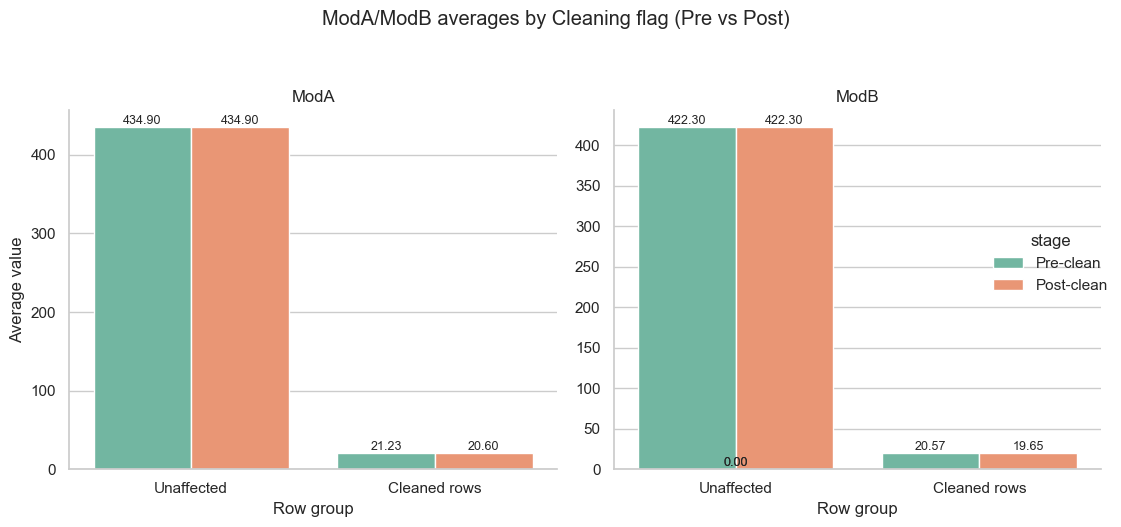

sensor         group       stage        mean
0   ModA    Unaffected   Pre-clean  434.903054
1   ModA    Unaffected  Post-clean  434.903054
2   ModA  Cleaned rows   Pre-clean   21.229647
3   ModA  Cleaned rows  Post-clean   20.600930
4   ModB    Unaffected   Pre-clean  422.299605
5   ModB    Unaffected  Post-clean  422.299605
6   ModB  Cleaned rows   Pre-clean   20.570533
7   ModB  Cleaned rows  Post-clean   19.650597

In [19]:
#Compute and plot averages by clean_flag (pre vs post)

# Tidy table for plotting
records = []
label_map = {False: "Unaffected", True: "Cleaned rows"}

for s in sensors:
    for flag_val, group_df in working.groupby("clean_flag"):
        grp = label_map.get(flag_val, str(flag_val))
        pre_mean = group_df[s + "_pre"].mean()
        post_mean = group_df[s + "_post"].mean()
        records.append({"sensor": s, "group": grp, "stage": "Pre-clean", "mean": pre_mean})
        records.append({"sensor": s, "group": grp, "stage": "Post-clean", "mean": post_mean})

impact = pd.DataFrame(records)

# Plot: one facet per sensor
g = sns.catplot(
    data=impact, x="group", y="mean", hue="stage",
    col="sensor", kind="bar", sharey=False, palette="Set2"
)
g.set_axis_labels("Row group", "Average value")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9, rotation=0)
plt.suptitle("ModA/ModB averages by Cleaning flag (Pre vs Post)", y=1.05)
plt.tight_layout()
plt.show()

impact


In [20]:
#Correlation & Relationship Analysis

#Load cleaned data
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

clean_path = "../data/togo_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure numeric types for columns we’ll use
for c in ["GHI","DNI","DHI","TModA","TModB","Tamb","WS","WSgust","WD","RH"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")
    


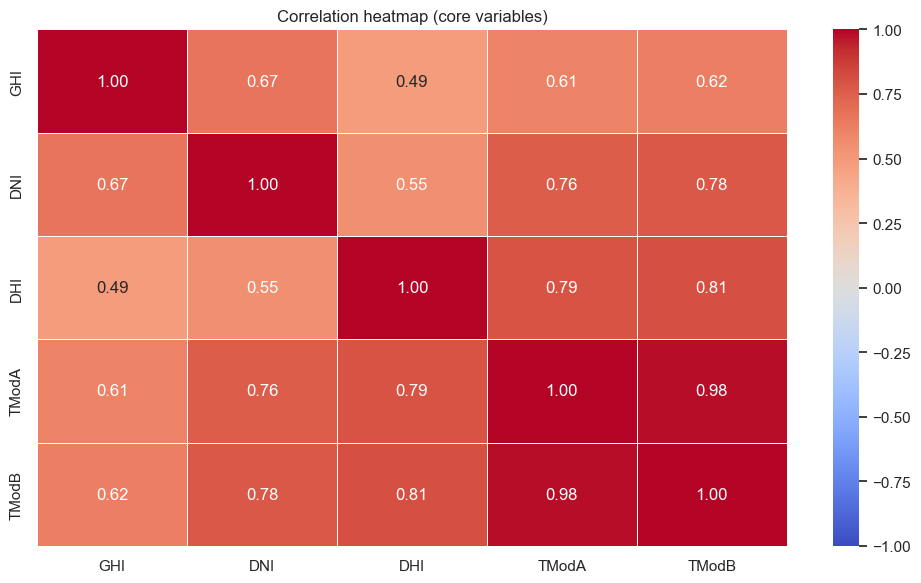

In [21]:
#Correlation heatmap (GHI, DNI, DHI, TModA, TModB)

core_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB"] if c in clean_df.columns]

# Drop any columns with no variance to avoid NaNs in corr
core_cols = [c for c in core_cols if clean_df[c].nunique(dropna=True) > 1]

if len(core_cols) >= 2:
    corr = clean_df[core_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation heatmap (core variables)")
    plt.tight_layout(); plt.show()
else:
    print("Not enough core columns with data to compute correlation.")

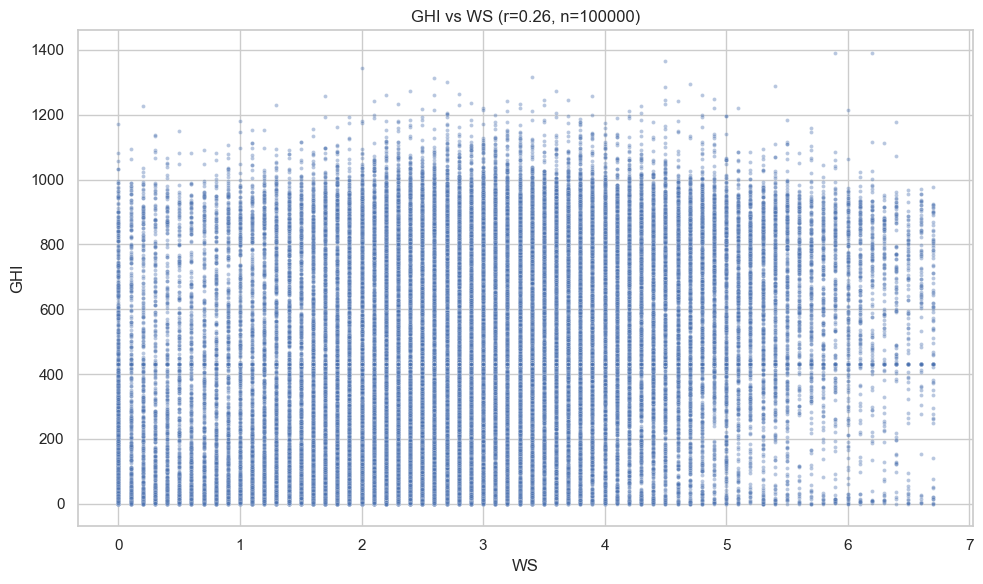

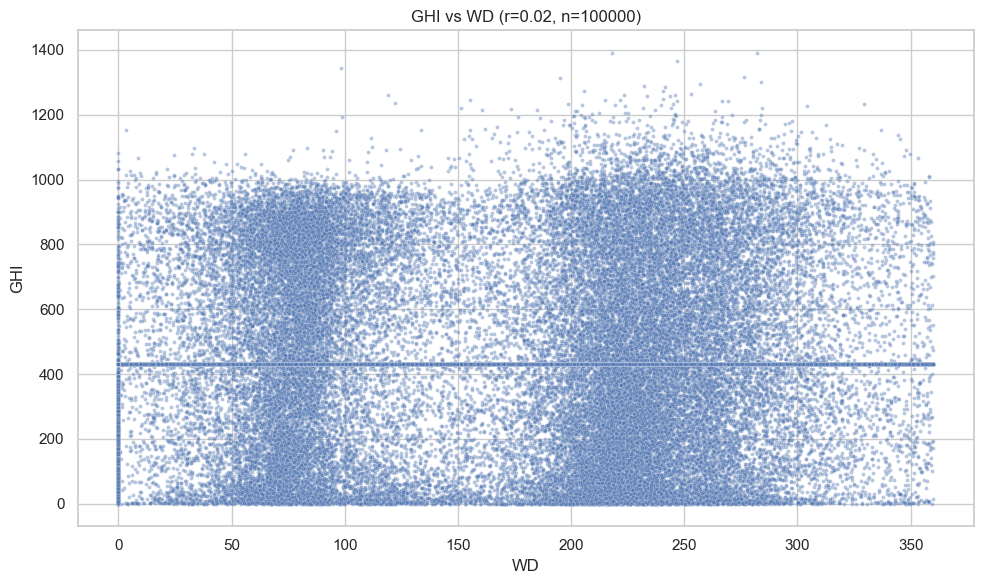

In [22]:
#Scatter plots: WS, WSgust, WD vs GHI

def scatter_with_r(df, x, y, sample_n=100000):
    data = df[[x, y]].dropna()
    if data.empty:
        print(f"Skipping {x} vs {y}: no data.")
        return
    if len(data) > sample_n:
        data = data.sample(sample_n, random_state=42)
    r = data[x].corr(data[y])
    sns.scatterplot(data=data, x=x, y=y, s=8, alpha=0.4)
    plt.title(f"{y} vs {x} (r={r:.2f}, n={len(data)})")
    plt.tight_layout(); plt.show()

if "GHI" in clean_df.columns:
    for x in ["WS", "WSgust", "WD"]:
        if x in clean_df.columns:
            scatter_with_r(clean_df, x, "GHI")
else:
    print("GHI not found; skipping WS/WSgust/WD vs GHI plots.")

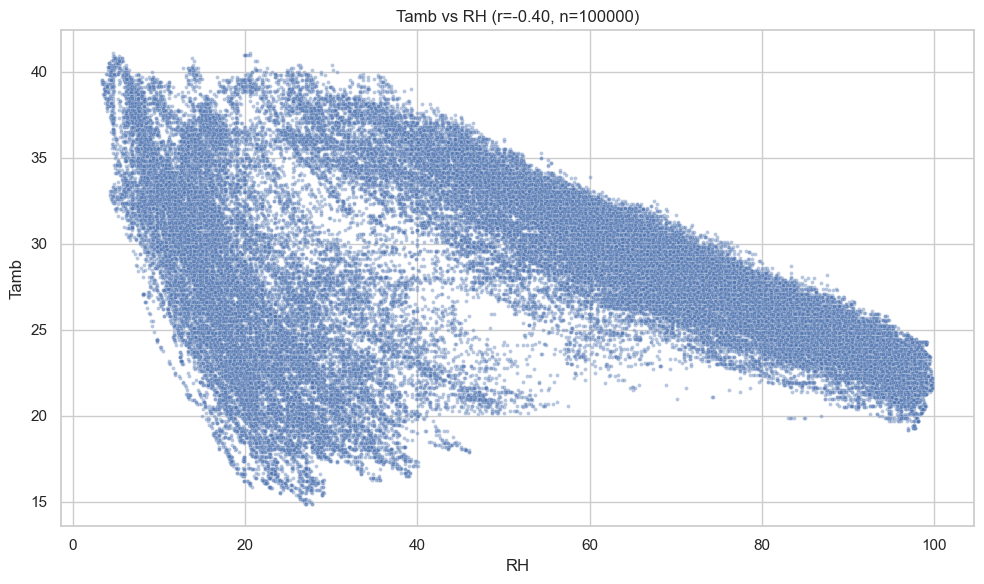

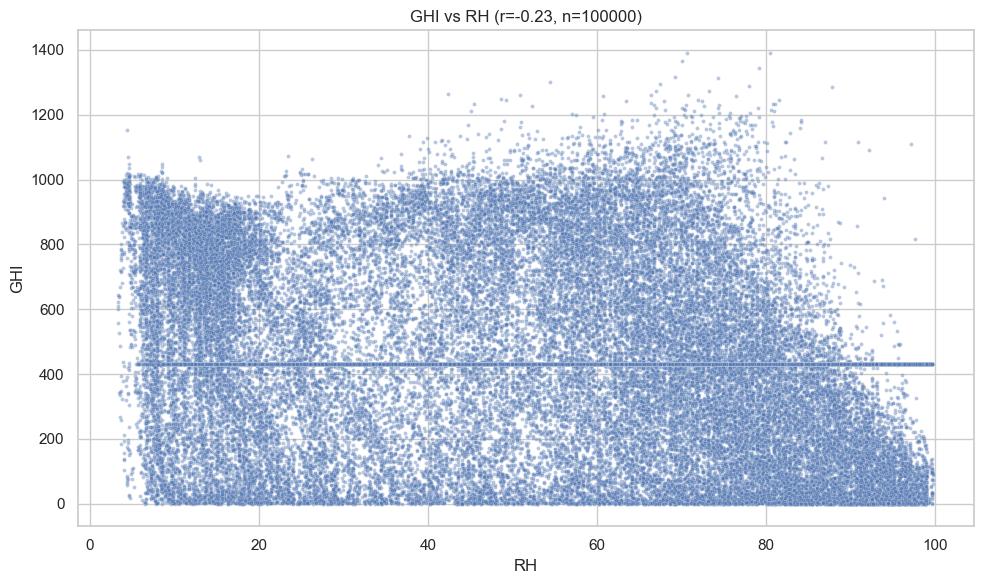

In [23]:
# RH relationships: RH vs Tamb and RH vs GHI

if "RH" in clean_df.columns and "Tamb" in clean_df.columns:
    scatter_with_r(clean_df, "RH", "Tamb")

if "RH" in clean_df.columns and "GHI" in clean_df.columns:
    scatter_with_r(clean_df, "RH", "GHI")

In [24]:
# Load cleaned data and prep wind columns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

clean_path = "../data/togo_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure numeric types
for c in ["WS","WD","GHI","WSgust"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

# Wind prep
if "WS" in clean_df.columns and "WD" in clean_df.columns:
    wind_df = clean_df[["WS","WD"]].dropna().copy()
    # WD within [0, 360)
    wind_df["WD"] = wind_df["WD"] % 360
    # Optional: ignore calms for rose (keep track to annotate)
    calm_threshold = 0.1
    calms_pct = (wind_df["WS"] <= calm_threshold).mean() * 100
    wind_valid = wind_df[wind_df["WS"] > calm_threshold]
    print(f"Wind samples: {len(wind_df):,}  |  Calms (<= {calm_threshold} m/s): {calms_pct:.1f}%")
else:
    raise ValueError("WS and/or WD not found in cleaned data. Make sure those columns exist.")

Wind samples: 525,600  |  Calms (<= 0.1 m/s): 7.5%


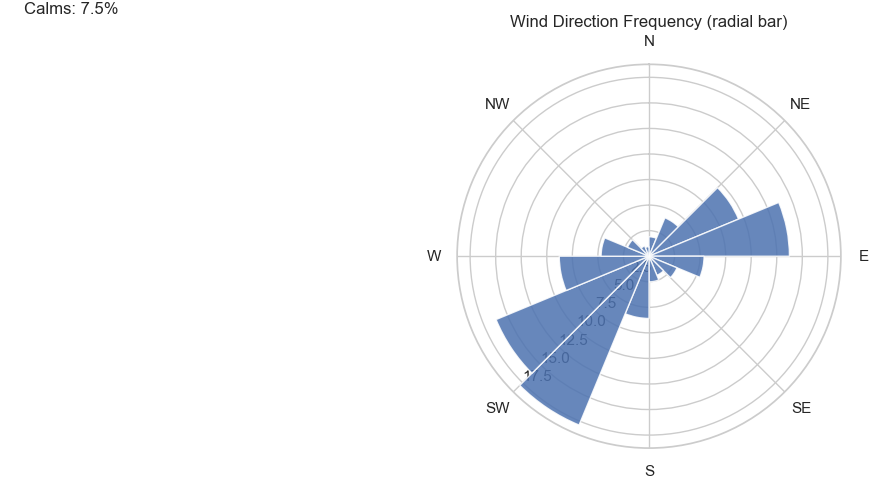

Tip: To install full wind rose support, run in a cell: %pip install windrose


In [25]:
#Wind rose (uses windrose if installed; else simple radial frequency)

# Try windrose library
try:
    from windrose import WindroseAxes
    has_windrose = True
except Exception:
    has_windrose = False

if has_windrose:
    # Typical speed bins (m/s); adjust if your site is calmer/stronger
    speed_bins = [0, 1, 3, 5, 8, 11, 14, 20]
    ax = WindroseAxes.from_ax()
    ax.bar(
        wind_valid["WD"], wind_valid["WS"],
        bins=speed_bins, normed=True, opening=0.8, edgecolor="white", nsector=16
    )
    ax.set_legend(title="WS (m/s)")
    plt.title("Wind Rose (frequency by direction and speed)")
    # Annotate calms
    plt.annotate(f"Calms: {calms_pct:.1f}%", xy=(0.02, 0.95), xycoords="figure fraction")
    plt.show()
else:
    # Fallback: simple radial bar plot of directional frequency (no speed stacking)
    nsector = 16  # 16 sectors = 22.5° each
    dir_edges = np.linspace(0, 360, nsector + 1)
    counts, _ = np.histogram(wind_valid["WD"], bins=dir_edges)
    perc = counts / counts.sum() * 100.0
    theta_centers = np.deg2rad((dir_edges[:-1] + dir_edges[1:]) / 2.0)
    width = np.deg2rad(360 / nsector)

    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    bars = ax.bar(theta_centers, perc, width=width, bottom=0.0, color="C0", edgecolor="white", alpha=0.85)
    ax.set_title("Wind Direction Frequency (radial bar)")
    ax.set_xticks(np.deg2rad([0,45,90,135,180,225,270,315]))
    ax.set_xticklabels(["N","NE","E","SE","S","SW","W","NW"])
    ax.set_rlabel_position(225)
    plt.annotate(f"Calms: {calms_pct:.1f}%", xy=(0.02, 0.95), xycoords="figure fraction")
    plt.tight_layout(); plt.show()

    print("Tip: To install full wind rose support, run in a cell: %pip install windrose")

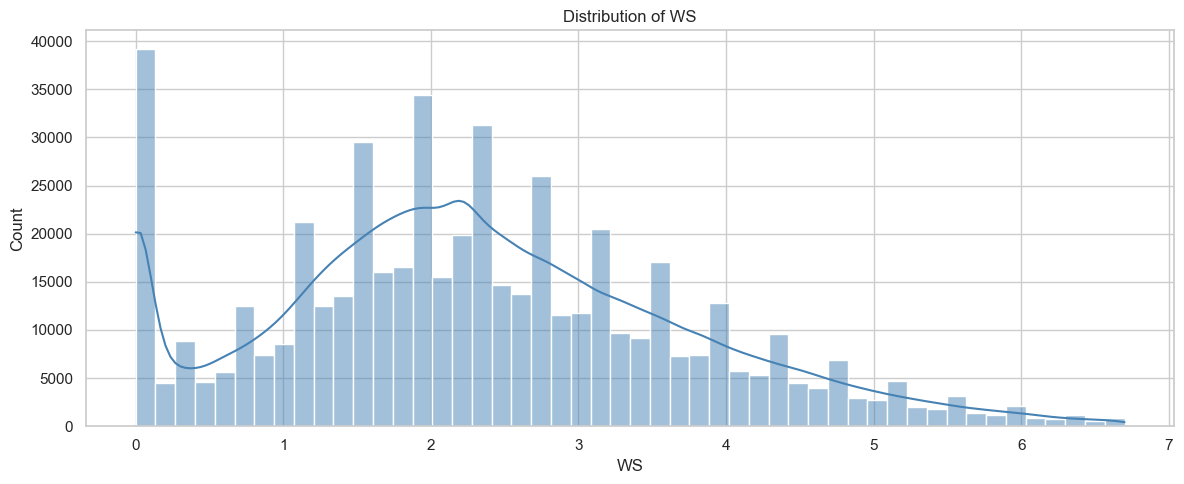

In [26]:
# Histograms for GHI and WS

# Choose GHI if available, otherwise try DNI/DHI
ghi_like = None
for c in ["GHI","DNI","DHI"]:
    if c in clean_df.columns:
        ghi_like = c
        break

plots = []
if ghi_like is not None:
    plots.append((ghi_like, "goldenrod"))
if "WS" in clean_df.columns:
    plots.append(("WS", "steelblue"))

for col, color in plots:
    sns.histplot(clean_df[col].dropna(), bins=50, kde=True, color=color)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

# Optional: zoomed-in GHI-only (positive values), if GHI exists
if ghi_like == "GHI":
    pos = clean_df["GHI"][clean_df["GHI"] > 0]
    if not pos.empty:
        sns.histplot(pos, bins=60, kde=True, color="orange")
        plt.title("Distribution of GHI (daytime only, >0)")
        plt.xlabel("GHI"); plt.ylabel("Count")
        plt.tight_layout(); plt.show()

In [27]:
#Temperature Analysis (RH influence on Tamb and GHI)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

clean_path = "../data/togo_clean.csv"
clean_df = pd.read_csv(clean_path)

# Make sure types are numeric
for c in ["RH","Tamb","GHI","DNI","DHI"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

# Parse time if present (useful for optional time-of-day views)
time_col = next((c for c in clean_df.columns if "time" in c.lower() or "date" in c.lower()), None)
if time_col:
    clean_df = clean_df.rename(columns={time_col: "Timestamp"})
    clean_df["Timestamp"] = pd.to_datetime(clean_df["Timestamp"], errors="coerce")

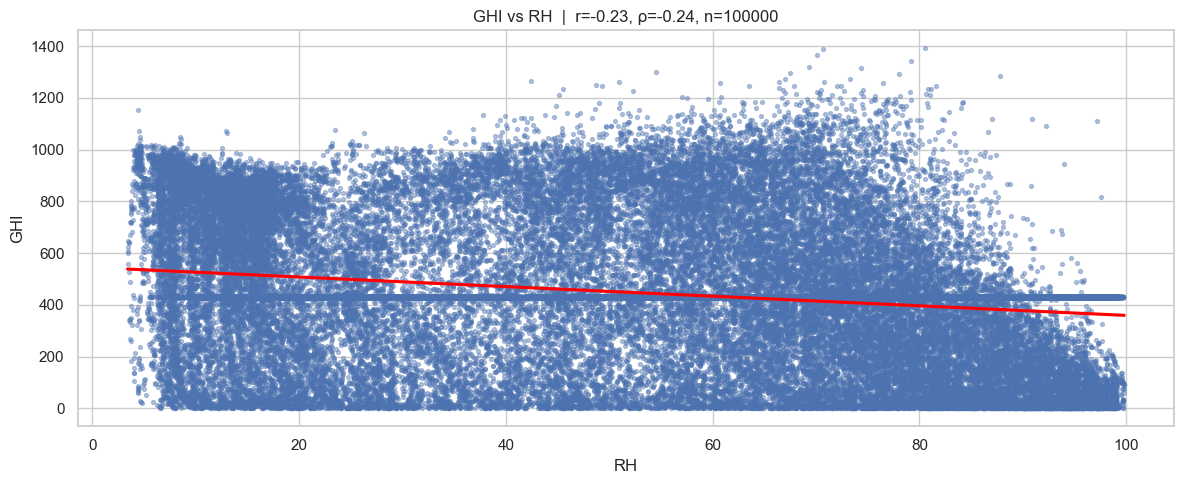

In [28]:
#Scatter + correlation: RH vs Tamb, RH vs GHI

def scatter_with_corr(df, x, y, sample_n=100000):
    data = df[[x, y]].dropna()
    if data.empty:
        print(f"Skipping {x} vs {y}: no data.")
        return
    if len(data) > sample_n:
        data = data.sample(sample_n, random_state=42)

    pearson = data[x].corr(data[y], method="pearson")
    spearman = data[x].corr(data[y], method="spearman")

    sns.regplot(data=data, x=x, y=y, scatter_kws=dict(s=8, alpha=0.4), line_kws=dict(color="red"))
    plt.title(f"{y} vs {x}  |  r={pearson:.2f}, ρ={spearman:.2f}, n={len(data)}")
    plt.tight_layout(); plt.show()

if "RH" in clean_df.columns and "Tamb" in clean_df.columns:
    scatter_with_corr(clean_df, "RH", "Tamb")

if "RH" in clean_df.columns and "GHI" in clean_df.columns:
    scatter_with_corr(clean_df, "RH", "GHI")

C:\Users\haymi\AppData\Local\Temp\ipykernel_14256\2733715330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("RH_bin")[target].mean()


C:\Users\haymi\AppData\Local\Temp\ipykernel_14256\2733715330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("RH_bin")[target].mean()


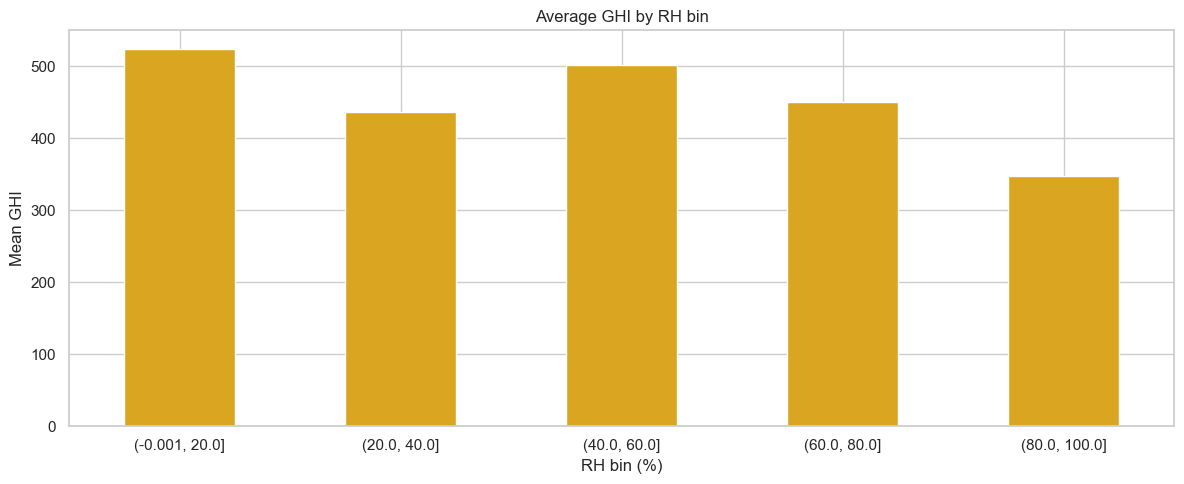

In [29]:
#RH bins → average Tamb and GHI

if "RH" in clean_df.columns:
    tmp = clean_df.copy()
    tmp["RH_bin"] = pd.cut(tmp["RH"], bins=[0,20,40,60,80,100], include_lowest=True)
    for target in [c for c in ["Tamb","GHI"] if c in tmp.columns]:
        g = tmp.groupby("RH_bin")[target].mean()
        g.plot(kind="bar", rot=0, color="teal" if target=="Tamb" else "goldenrod")
        plt.title(f"Average {target} by RH bin")
        plt.xlabel("RH bin (%)"); plt.ylabel(f"Mean {target}")
        plt.tight_layout(); plt.show()
else:
    print("RH not found — skipping RH bin analysis.")

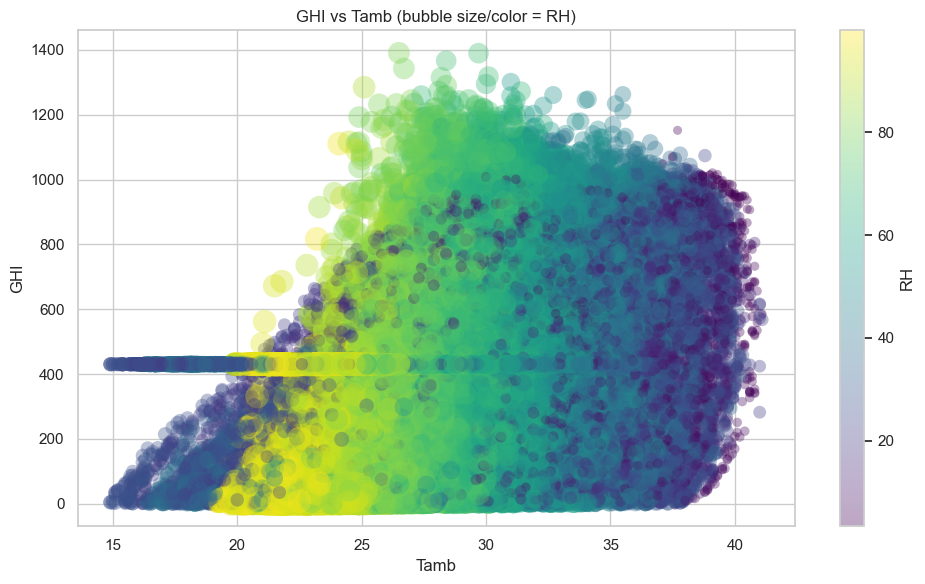

In [30]:
#GHI vs Tamb with bubble size = RH (fallback: BP)

# Decide bubble-size variable
size_col = "RH" if "RH" in clean_df.columns else ("BP" if "BP" in clean_df.columns else None)

if {"GHI","Tamb"}.issubset(clean_df.columns) and size_col is not None:
    data = clean_df[["GHI","Tamb", size_col]].dropna().copy()
    # Optional: focus on daytime to reduce zero-GHI clutter
    data = data[data["GHI"] >= 0]
    # Sample if huge
    if len(data) > 100000:
        data = data.sample(100000, random_state=42)

    s = data[size_col]
    sizes = 40 + 260 * (s - s.min()) / (s.max() - s.min() + 1e-9)

    plt.figure(figsize=(10,6))
    sc = plt.scatter(data["Tamb"], data["GHI"], s=sizes, c=s, cmap="viridis", alpha=0.35, edgecolors="none")
    cbar = plt.colorbar(sc); cbar.set_label(size_col)
    plt.xlabel("Tamb"); plt.ylabel("GHI")
    plt.title(f"GHI vs Tamb (bubble size/color = {size_col})")
    plt.tight_layout(); plt.show()
else:
    print("Missing required columns for bubble chart. Need GHI, Tamb, and RH or BP.")